C:\Users\Gryffindor\AppData\Local\Temp\ipykernel_5816\4201483164.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='Set2')


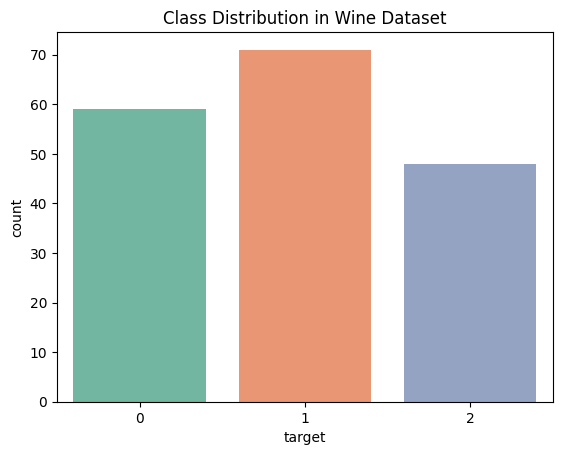

SVM Accuracy: 0.9629629629629629
Random Forest Accuracy: 1.0


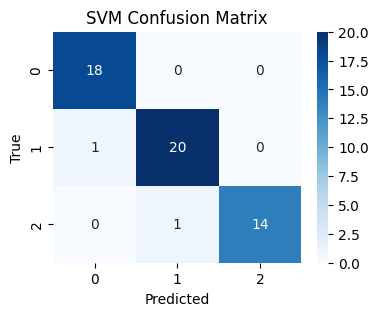

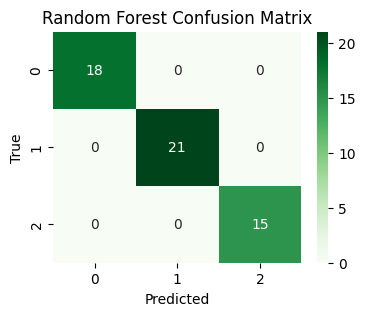


SVM Classification Report:
               precision    recall  f1-score   support

     class_0       0.95      1.00      0.97        18
     class_1       0.95      0.95      0.95        21
     class_2       1.00      0.93      0.97        15

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.96      0.96      0.96        54

Random Forest Classification Report:
               precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        18
     class_1       1.00      1.00      1.00        21
     class_2       1.00      1.00      1.00        15

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names
target_names = wine.target_names

df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

sns.countplot(x='target', data=df, palette='Set2')
plt.title('Class Distribution in Wine Dataset')
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted'); plt.ylabel('True')
plt.show()

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted'); plt.ylabel('True')
plt.show()

print("\nSVM Classification Report:\n", classification_report(y_test, y_pred_svm, target_names=target_names))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf, target_names=target_names))


C:\Users\Gryffindor\AppData\Local\Temp\ipykernel_12308\721328361.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="target", data=df, palette="Set2")


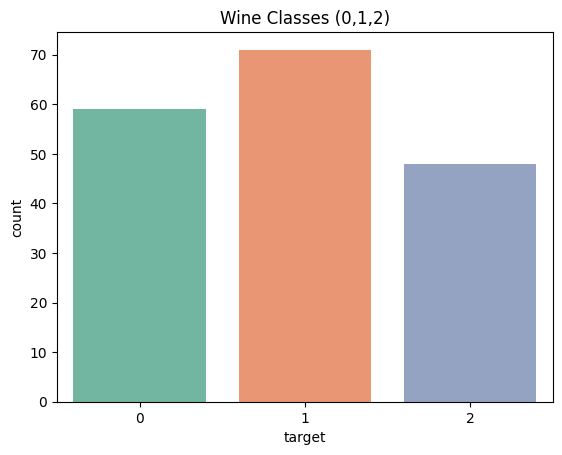

SVM Accuracy: 0.963
RF  Accuracy: 1.000

SVM Confusion Matrix:
 [[18  0  0]
 [ 1 20  0]
 [ 0  1 14]]

RF Confusion Matrix:
 [[18  0  0]
 [ 0 21  0]
 [ 0  0 15]]

SVM Classification Report:
               precision    recall  f1-score   support

     class_0       0.95      1.00      0.97        18
     class_1       0.95      0.95      0.95        21
     class_2       1.00      0.93      0.97        15

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.96      0.96      0.96        54

RF Classification Report:
               precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        18
     class_1       1.00      1.00      1.00        21
     class_2       1.00      1.00      1.00        15

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



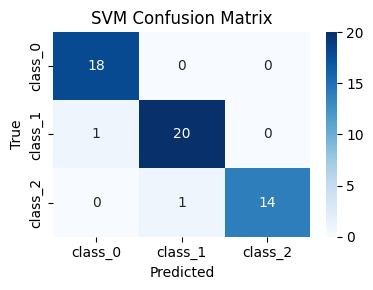

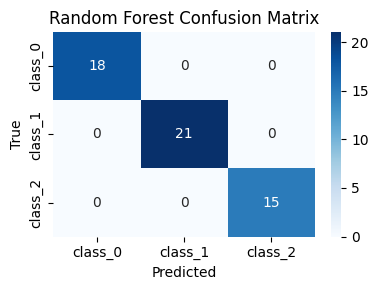

C:\Users\Gryffindor\AppData\Local\Temp\ipykernel_12308\721328361.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rf_imp[idx_rf][:10], y=np.array(feature_names)[idx_rf][:10], palette="viridis")


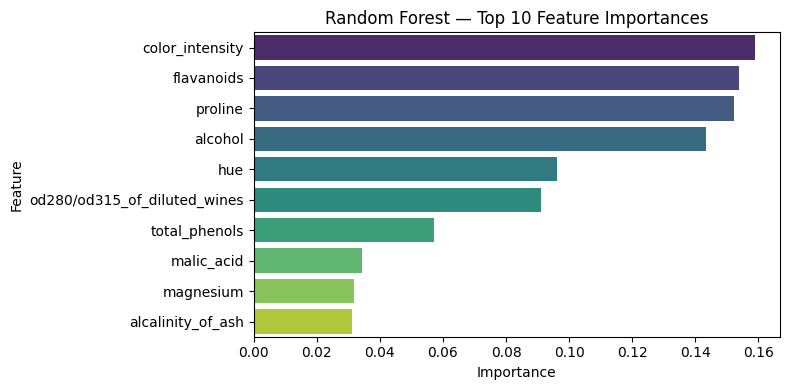

C:\Users\Gryffindor\AppData\Local\Temp\ipykernel_12308\721328361.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=svm_imp[idx_svm][:10], y=np.array(feature_names)[idx_svm][:10], palette="magma")


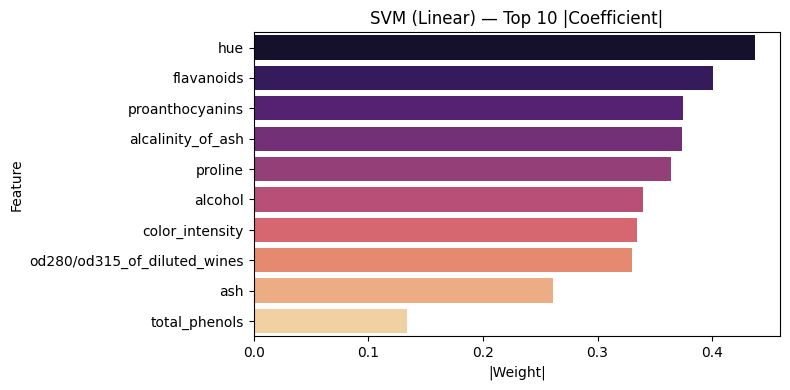

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline

# ==== Load dataset (use CSV if you have one named wine.csv) ====
# df = pd.read_csv("wine.csv")
# X = df.drop(columns=["target"]).values
# y = df["target"].values

wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names
target_names = wine.target_names
df = pd.DataFrame(X, columns=feature_names); df["target"] = y

# Class distribution
sns.countplot(x="target", data=df, palette="Set2")
plt.title("Wine Classes (0,1,2)"); plt.show()

# ==== Train / test split (70/30) ====
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

# ==== SVM (linear kernel) with scaling ====
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="linear", probability=False, random_state=42))
])
svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)

# ==== Random Forest ====
rf_clf = RandomForestClassifier(n_estimators=300, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

# ==== Metrics ====
print(f"SVM Accuracy: {accuracy_score(y_test, y_pred_svm):.3f}")
print(f"RF  Accuracy: {accuracy_score(y_test, y_pred_rf):.3f}")

print("\nSVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("\nRF Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

print("\nSVM Classification Report:\n",
      classification_report(y_test, y_pred_svm, target_names=target_names))
print("RF Classification Report:\n",
      classification_report(y_test, y_pred_rf, target_names=target_names))

# ==== Plot confusion matrices ====
def plot_cm(cm, title):
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=target_names, yticklabels=target_names)
    plt.title(title); plt.xlabel("Predicted"); plt.ylabel("True")
    plt.tight_layout(); plt.show()

plot_cm(confusion_matrix(y_test, y_pred_svm), "SVM Confusion Matrix")
plot_cm(confusion_matrix(y_test, y_pred_rf),  "Random Forest Confusion Matrix")

# ==== Feature importance ====
# RF importances
rf_imp = rf_clf.feature_importances_
idx_rf = np.argsort(rf_imp)[::-1]
plt.figure(figsize=(8,4))
sns.barplot(x=rf_imp[idx_rf][:10], y=np.array(feature_names)[idx_rf][:10], palette="viridis")
plt.title("Random Forest — Top 10 Feature Importances"); plt.xlabel("Importance"); plt.ylabel("Feature")
plt.tight_layout(); plt.show()

# SVM (linear) coefficients → mean |coef| across classes
svm = svm_clf.named_steps["svm"]
svm_imp = np.mean(np.abs(svm.coef_), axis=0)
idx_svm = np.argsort(svm_imp)[::-1]
plt.figure(figsize=(8,4))
sns.barplot(x=svm_imp[idx_svm][:10], y=np.array(feature_names)[idx_svm][:10], palette="magma")
plt.title("SVM (Linear) — Top 10 |Coefficient|"); plt.xlabel("|Weight|"); plt.ylabel("Feature")
plt.tight_layout(); plt.show()


C:\Users\Gryffindor\AppData\Local\Temp\ipykernel_12800\3231698598.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y.map(dict(enumerate(target_names))), palette='coolwarm')


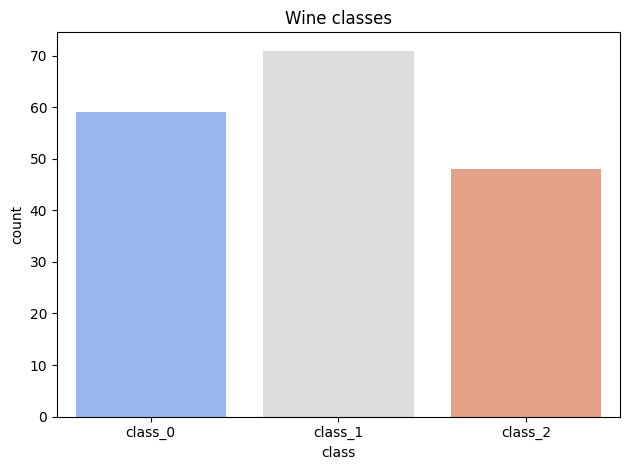

SVM Accuracy: 0.963
Random Forest Accuracy: 1.0

SVM Confusion Matrix:
 [[18  0  0]
 [ 1 20  0]
 [ 0  1 14]]

Random Forest Confusion Matrix:
 [[18  0  0]
 [ 0 21  0]
 [ 0  0 15]]

SVM Classification Report:
               precision    recall  f1-score   support

     class_0       0.95      1.00      0.97        18
     class_1       0.95      0.95      0.95        21
     class_2       1.00      0.93      0.97        15

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.96      0.96      0.96        54

Random Forest Classification Report:
               precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        18
     class_1       1.00      1.00      1.00        21
     class_2       1.00      1.00      1.00        15

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00   

C:\Users\Gryffindor\AppData\Local\Temp\ipykernel_12800\3231698598.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rf_importance[rf_idx], y=feature_names[rf_idx], palette='viridis')


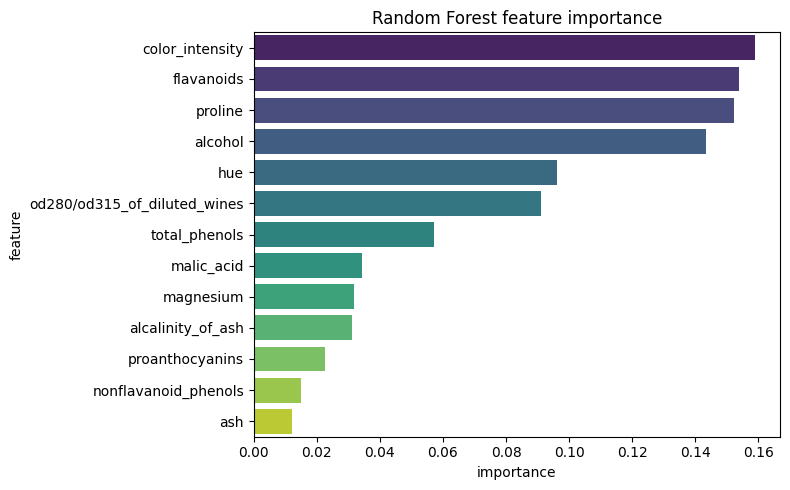

C:\Users\Gryffindor\AppData\Local\Temp\ipykernel_12800\3231698598.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=svm_coef[svm_idx], y=feature_names[svm_idx], palette='viridis')


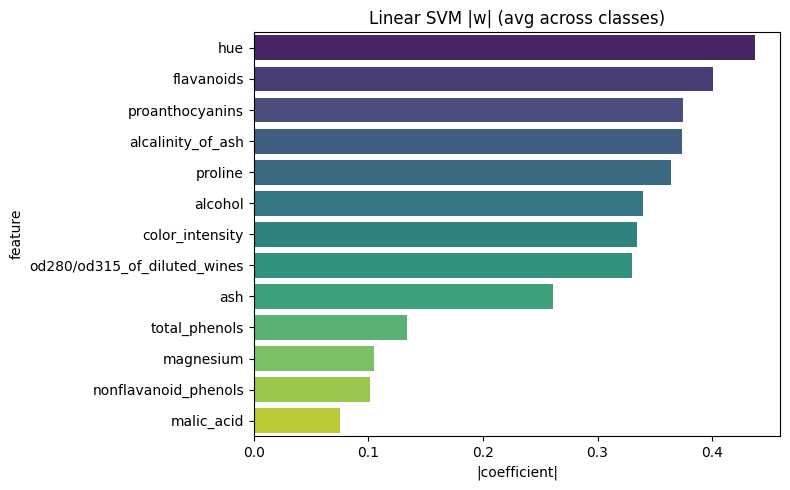

In [2]:
# Random Forest vs. SVM on the Wine dataset (3-class classification)

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1) Load data (13 features, 3 classes, 178 samples)
wine = load_wine(as_frame=True)   # data, target, feature_names, target_names
df = wine.frame.copy()
X = df.drop(columns=['target'])
y = df['target']
feature_names = X.columns
target_names = list(wine.target_names)

# 2) Quick class balance plot
sns.countplot(x=y.map(dict(enumerate(target_names))), palette='coolwarm')
plt.title('Wine classes')
plt.xlabel('class')
plt.ylabel('count')
plt.tight_layout()
plt.show()

# 3) Train/test split (70/30 as per prompt; stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 4) Scale features for SVM (linear kernel works well here)
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

# 5) Train models
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_s, y_train)
y_pred_svm = svm_model.predict(X_test_s)

rf_model = RandomForestClassifier(
    n_estimators=300, random_state=42, n_jobs=-1
)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# 6) Metrics
print("SVM Accuracy:", round(accuracy_score(y_test, y_pred_svm), 4))
print("Random Forest Accuracy:", round(accuracy_score(y_test, y_pred_rf), 4))

print("\nSVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("\nRandom Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

print("\nSVM Classification Report:\n",
      classification_report(y_test, y_pred_svm, target_names=target_names))
print("Random Forest Classification Report:\n",
      classification_report(y_test, y_pred_rf, target_names=target_names))

# 7) Feature importances (RF)
rf_importance = rf_model.feature_importances_
rf_idx = np.argsort(rf_importance)[::-1]
plt.figure(figsize=(8,5))
sns.barplot(x=rf_importance[rf_idx], y=feature_names[rf_idx], palette='viridis')
plt.title('Random Forest feature importance')
plt.xlabel('importance')
plt.ylabel('feature')
plt.tight_layout()
plt.show()

# 8) Feature importances (linear SVM absolute coefficients, one-vs-rest averaged)
svm_coef = np.mean(np.abs(svm_model.coef_), axis=0)
svm_idx = np.argsort(svm_coef)[::-1]
plt.figure(figsize=(8,5))
sns.barplot(x=svm_coef[svm_idx], y=feature_names[svm_idx], palette='viridis')
plt.title('Linear SVM |w| (avg across classes)')
plt.xlabel('|coefficient|')
plt.ylabel('feature')
plt.tight_layout()
plt.show()
